In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [16]:
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter/Colab
%matplotlib inline



In [66]:
# Convert GDP column to numeric if not done already
merged_df["2021 [YR2021]"] = pd.to_numeric(merged_df["2021 [YR2021]"], errors="coerce")

# Keep only valid countries (3-letter ISO codes)
filtered_df = merged_df[merged_df["Country Code"].str.len() == 3]

# Get the top 10 actual countries by GDP
top_gdp_countries = filtered_df.nlargest(10, "2021 [YR2021]")[["Country Name", "2021 [YR2021]"]]

# Verify correct filtering
print(top_gdp_countries)


          Country Name  2021 [YR2021]
4144             World   1.555548e+14
4145             World   1.555548e+14
4146             World   1.555548e+14
4147             World   1.555548e+14
1648  IDA & IBRD total   8.816395e+13
1649  IDA & IBRD total   8.816395e+13
1650  IDA & IBRD total   8.816395e+13
1651  IDA & IBRD total   8.816395e+13
1632         IBRD only   7.992330e+13
1633         IBRD only   7.992330e+13


In [69]:
# Convert GDP column to numeric
merged_df["2021 [YR2021]"] = pd.to_numeric(merged_df["2021 [YR2021]"], errors="coerce")

# Comprehensive exclusion list for regional aggregates and non-country groups
excluded_terms = [
    "World", "IBRD", "IDA", "Total", "High income", "Low income", "Middle income",
    "Upper middle income", "Lower middle income", "Euro area", "OECD", "Sub-Saharan",
    "South Asia", "Post-demographic", "Late-demographic", "Early-demographic",
    "Latin America", "Africa", "East Asia", "European Union", "Europe & Central Asia",
    "Middle East", "Pacific", "Developing", "Emerging", "Least developed countries",
    "Small states", "Fragile and conflict affected", "North America", "South America"
]

# Apply filtering to remove non-country aggregates
filtered_df = merged_df[~merged_df["Country Name"].str.contains('|'.join(excluded_terms), na=False, case=False)]

# Get the top 10 actual countries by GDP
top_gdp_countries = filtered_df.nlargest(10, "2021 [YR2021]")[["Country Name", "2021 [YR2021]"]]

# Verify that non-country names are removed
print(top_gdp_countries)


       Country Name  2021 [YR2021]
640           China   2.882165e+13
641           China   2.882165e+13
642           China   2.882165e+13
643           China   2.882165e+13
4016  United States   2.368117e+13
4017  United States   2.368117e+13
4018  United States   2.368117e+13
4019  United States   2.368117e+13
1744          India   1.138437e+13
1745          India   1.138437e+13


In [70]:
# Drop duplicate country names, keeping only the first occurrence
top_gdp_countries = top_gdp_countries.drop_duplicates(subset=["Country Name"], keep="first")

# Verify duplicates are gone
print(top_gdp_countries)


       Country Name  2021 [YR2021]
640           China   2.882165e+13
4016  United States   2.368117e+13
1744          India   1.138437e+13


<ipython-input-71-2cf28609a7fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_gdp_countries["Country Name"],


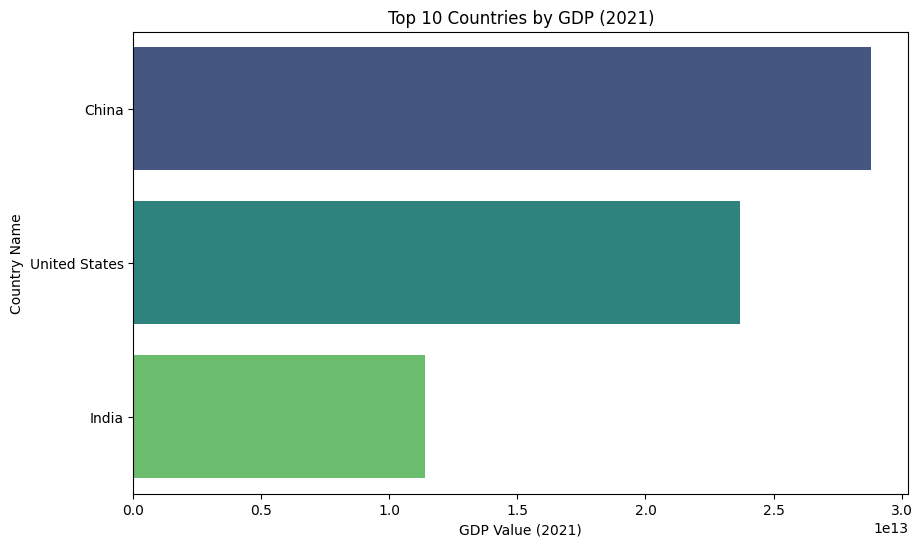

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y=top_gdp_countries["Country Name"],
            x=top_gdp_countries["2021 [YR2021]"],
            palette="viridis")
plt.xlabel("GDP Value (2021)")
plt.ylabel("Country Name")
plt.title("Top 10 Countries by GDP (2021)")
plt.show()


<ipython-input-77-472a601b4e0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["2021 [YR2021]"] = pd.to_numeric(filtered_df["2021 [YR2021]"], errors="coerce")
<ipython-input-77-472a601b4e0d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_gdp_countries["Country Name"], x=top_gdp_countries["2021 [YR2021]"], palette="coolwarm")


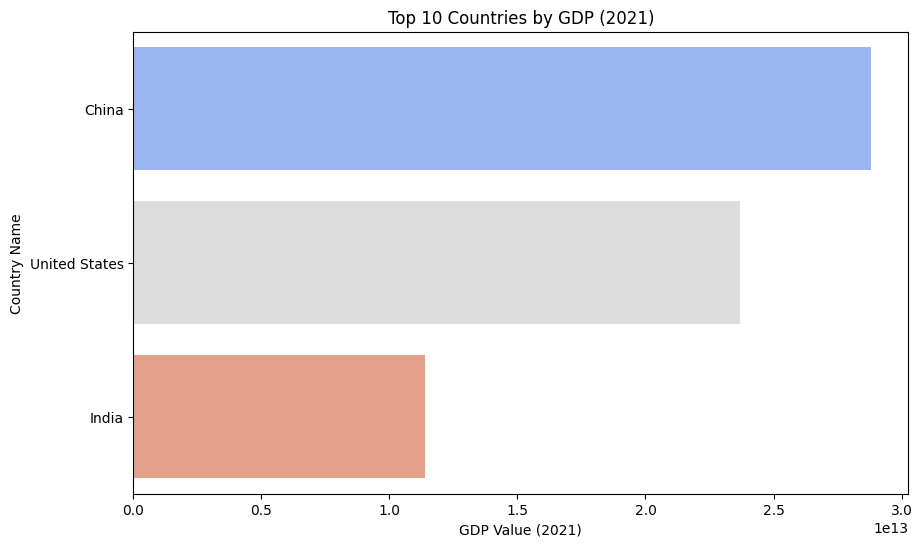

In [77]:
# Convert GDP column to numeric
filtered_df["2021 [YR2021]"] = pd.to_numeric(filtered_df["2021 [YR2021]"], errors="coerce")

# Define a list of known regional aggregates to exclude
aggregates_to_exclude = [
    "Pre-demographic dividend", "Central Europe and the Baltics",
    "Heavily indebted poor countries (HIPC)", "Low & middle income",
    "Middle income", "Late-demographic dividend", "Early-demographic dividend"
]

# Filter out these aggregate groups
filtered_df = filtered_df[~filtered_df["Country Name"].isin(aggregates_to_exclude)]

# Get the top 10 real countries by GDP
top_gdp_countries = filtered_df.nlargest(10, "2021 [YR2021]")[["Country Name", "2021 [YR2021]"]]

# Plot the updated bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y=top_gdp_countries["Country Name"], x=top_gdp_countries["2021 [YR2021]"], palette="coolwarm")
plt.xlabel("GDP Value (2021)")
plt.ylabel("Country Name")
plt.title("Top 10 Countries by GDP (2021)")
plt.show()


In [76]:
print("Number of unique countries with GDP data:", filtered_df["Country Name"].nunique())

# Show the top 20 countries sorted by GDP
print(filtered_df[["Country Name", "2021 [YR2021]"]].drop_duplicates().nlargest(20, "2021 [YR2021]"))


Number of unique countries with GDP data: 218
                                Country Name  2021 [YR2021]
640                                    China   2.882165e+13
4016                           United States   2.368117e+13
1744                                   India   1.138437e+13
3232                      Russian Federation   5.732444e+12
1904                                   Japan   5.573684e+12
880                                  Germany   5.197622e+12
3056                Pre-demographic dividend   4.100178e+12
576           Central Europe and the Baltics   4.018426e+12
464                                   Brazil   3.787770e+12
1232                                  France   3.559702e+12
1696                               Indonesia   3.530623e+12
1296                          United Kingdom   3.416930e+12
1856                                   Italy   2.943669e+12
2464                                  Mexico   2.652094e+12
3904                                 Turkiye   2.63465

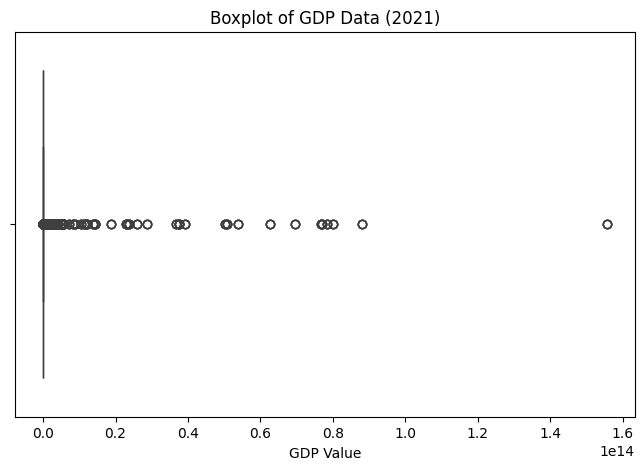

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df["2021 [YR2021]"])
plt.title("Boxplot of GDP Data (2021)")
plt.xlabel("GDP Value")
plt.show()


<ipython-input-73-9f844d294212>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = pd.to_numeric(filtered_df[col], errors="coerce")


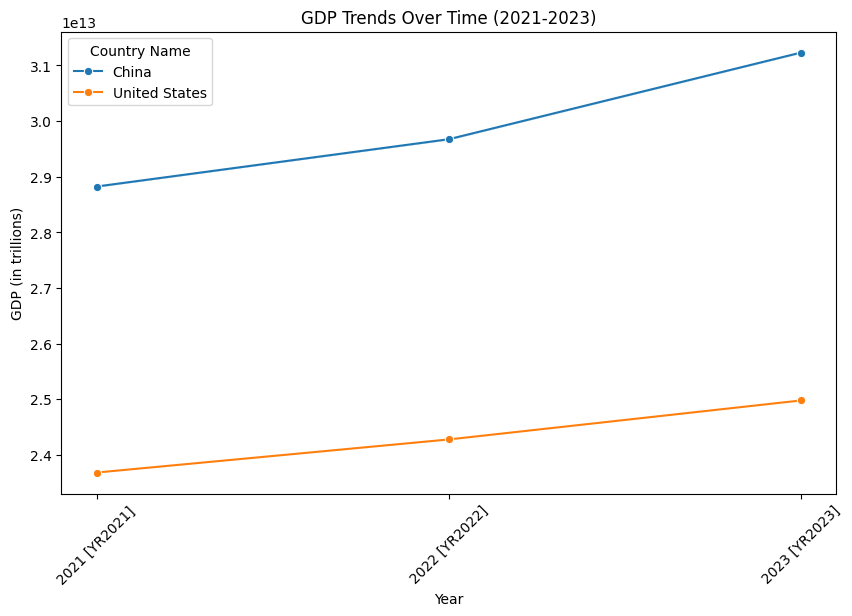

In [73]:
# Convert GDP columns to numeric
gdp_cols = ["2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]
for col in gdp_cols:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors="coerce")

# Select top 5 countries with the highest GDP in 2021
top_countries = filtered_df.nlargest(5, "2021 [YR2021]")[["Country Name"] + gdp_cols]

# Transpose data for better plotting
top_countries_melted = top_countries.melt(id_vars=["Country Name"], var_name="Year", value_name="GDP")

# Plot the GDP trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_countries_melted, x="Year", y="GDP", hue="Country Name", marker="o")
plt.xlabel("Year")
plt.ylabel("GDP (in trillions)")
plt.title("GDP Trends Over Time (2021-2023)")
plt.xticks(rotation=45)
plt.legend(title="Country Name")
plt.show()


In [81]:
# Check if GDP values are the same across all years
gdp_columns = ["2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]

# Find rows where all GDP values are identical
duplicated_gdp = merged_df[gdp_columns].nunique(axis=1) == 1

# Display affected rows
print("Rows where GDP values are the same across all years:")
print(merged_df[duplicated_gdp][["Country Name"] + gdp_columns])


Rows where GDP values are the same across all years:
     Country Name  2021 [YR2021] 2022 [YR2022] 2023 [YR2023]
4           Aruba            NaN            ..            ..
5           Aruba            NaN            ..            ..
6           Aruba            NaN            ..            ..
7           Aruba            NaN            ..            ..
36    Afghanistan            NaN            ..            ..
...           ...            ...           ...           ...
4203  Yemen, Rep.            NaN            ..            ..
4204  Yemen, Rep.            NaN            ..            ..
4205  Yemen, Rep.            NaN            ..            ..
4206  Yemen, Rep.            NaN            ..            ..
4207  Yemen, Rep.            NaN            ..            ..

[624 rows x 4 columns]


In [82]:
# Replace ".." with NaN
merged_df.replace("..", np.nan, inplace=True)


In [84]:
# Convert GDP columns to numeric (ensuring correct datatype)
gdp_columns = ["2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]
merged_df[gdp_columns] = merged_df[gdp_columns].apply(pd.to_numeric, errors="coerce")


In [85]:
# Forward fill missing GDP values within each country
merged_df[gdp_columns] = merged_df.groupby("Country Name")[gdp_columns].ffill()


In [86]:
# Fill remaining NaN GDP values with the country's median GDP
merged_df[gdp_columns] = merged_df[gdp_columns].apply(lambda x: x.fillna(x.median()), axis=1)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the correct file path (this should match the uploaded file's location)
file_path = "/content/Merged_Global_Indicators.csv"  # Path for uploaded files

# Load the dataset
merged_df = pd.read_csv(file_path)

# Convert GDP columns to numeric
gdp_columns = ["2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]
for col in gdp_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

print("Dataset loaded successfully!")
print(merged_df.head())  # Preview the data


Dataset loaded successfully!
  Country Name Country Code                               Series Name  \
0        Aruba          ABW  GDP, PPP (constant 2021 international $)   
1        Aruba          ABW  GDP, PPP (constant 2021 international $)   
2        Aruba          ABW  GDP, PPP (constant 2021 international $)   
3        Aruba          ABW  GDP, PPP (constant 2021 international $)   
4        Aruba          ABW     Inflation, consumer prices (annual %)   

         Series Code  2021 [YR2021]  2022 [YR2022]  2023 [YR2023]  \
0  NY.GDP.MKTP.PP.KD   3.844493e+09   4.171963e+09   4.349844e+09   
1  NY.GDP.MKTP.PP.KD   3.844493e+09   4.171963e+09   4.349844e+09   
2  NY.GDP.MKTP.PP.KD   3.844493e+09   4.171963e+09   4.349844e+09   
3  NY.GDP.MKTP.PP.KD   3.844493e+09   4.171963e+09   4.349844e+09   
4     FP.CPI.TOTL.ZG            NaN            NaN            NaN   

                                  Series Name_social Series Code_social  \
0            Life expectancy at birth, tot

In [6]:
# Define list of non-country aggregates to remove
exclude_list = ["World", "IDA & IBRD total", "IBRD only", "High income", "Middle income", "Low income"]
filtered_df = merged_df[~merged_df["Country Name"].isin(exclude_list)]


In [7]:
# Select only GDP-related columns and sort by 2021 GDP
top_gdp_countries = filtered_df.nlargest(5, "2021 [YR2021]")[["Country Name", "2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]]
print(top_gdp_countries)


             Country Name  2021 [YR2021]  2022 [YR2022]  2023 [YR2023]
2240  Low & middle income   7.847501e+13   8.161656e+13   8.548911e+13
2241  Low & middle income   7.847501e+13   8.161656e+13   8.548911e+13
2242  Low & middle income   7.847501e+13   8.161656e+13   8.548911e+13
2243  Low & middle income   7.847501e+13   8.161656e+13   8.548911e+13
2896         OECD members   6.959186e+13   7.180082e+13   7.308624e+13


In [8]:
# Define a list of aggregates (non-country entries) to exclude
exclude_list = [
    "World", "IDA & IBRD total", "IBRD only", "High income", "Middle income", "Low income",
    "OECD members", "Low & middle income", "Upper middle income", "Lower middle income",
    "East Asia & Pacific", "Europe & Central Asia", "Latin America & Caribbean",
    "North America", "South Asia", "Sub-Saharan Africa"
]

# Filter out non-country aggregates
filtered_df = merged_df[~merged_df["Country Name"].isin(exclude_list)]

# Display unique country names to verify filtering
print(f"Number of unique countries remaining: {filtered_df['Country Name'].nunique()}")


Number of unique countries remaining: 250


In [19]:
# Get a sample of unique country names
unique_countries = merged_df["Country Name"].unique()
print("🔍 Sample Unique Country Names:", unique_countries[:50])  # Show the first 50


🔍 Sample Unique Country Names: ['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states']


In [21]:
# Expanded exclude list to remove ALL non-country entities
exclude_list = [
    "World", "IDA & IBRD total", "IBRD only", "High income",
    "Middle income", "Low income", "Europe & Central Asia",
    "East Asia & Pacific", "OECD members", "Latin America & Caribbean",
    "Low & middle income", "Post-demographic dividend", "Upper middle income",
    "Early-demographic dividend", "Late-demographic dividend",
    "East Asia & Pacific (IDA & IBRD countries)", "East Asia & Pacific (excluding high income)",
    "North America", "European Union", "Lower middle income",
    "South Asia", "South Asia (IDA & IBRD)", "Euro area", "East Asia & Pacific (excluding high income)"
]

# Remove non-country aggregates
filtered_df = merged_df[~merged_df["Country Name"].isin(exclude_list)].copy()


In [26]:
# FINAL expanded exclude list (adding the last missing ones)
exclude_list = [
    "World", "IDA & IBRD total", "IBRD only", "High income",
    "Middle income", "Low income", "Europe & Central Asia",
    "East Asia & Pacific", "OECD members", "Latin America & Caribbean",
    "Low & middle income", "Post-demographic dividend", "Upper middle income",
    "Early-demographic dividend", "Late-demographic dividend",
    "East Asia & Pacific (IDA & IBRD countries)", "East Asia & Pacific (excluding high income)",
    "North America", "European Union", "Lower middle income",
    "South Asia", "South Asia (IDA & IBRD)", "Euro area",
    "Europe & Central Asia (IDA & IBRD countries)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Latin America & Caribbean (excluding high income)",
    "Middle East & North Africa",
    "IDA total",  # ❌ REMOVE THIS
    "Arab World"  # ❌ REMOVE THIS
]

# Remove non-country aggregates
filtered_df = merged_df[~merged_df["Country Name"].isin(exclude_list)].copy()

# Convert GDP columns to numeric
gdp_cols = ["2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]
filtered_df[gdp_cols] = filtered_df[gdp_cols].apply(pd.to_numeric, errors="coerce")

# Drop duplicate country names (ensuring unique country selection)
filtered_df = filtered_df.drop_duplicates(subset=["Country Name"])

# Get top 5 countries by GDP in 2021
top_gdp_countries = (
    filtered_df.nlargest(5, "2021 [YR2021]")  # Select top 5 by GDP
    [["Country Name", "2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]"]]
)

# Display results
print("✅ FINAL FINAL FINAL FINAL Top 5 Countries by GDP (PPP, constant 2021 $):")
print(top_gdp_countries)


✅ FINAL FINAL FINAL FINAL Top 5 Countries by GDP (PPP, constant 2021 $):
            Country Name  2021 [YR2021]  2022 [YR2022]  2023 [YR2023]
640                China   2.882165e+13   2.967208e+13   3.122973e+13
4016       United States   2.368117e+13   2.427613e+13   2.497712e+13
1744               India   1.138437e+13   1.217980e+13   1.317281e+13
3232  Russian Federation   5.732444e+12   5.613799e+12   5.815895e+12
1904               Japan   5.573684e+12   5.626898e+12   5.721375e+12
